In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [2]:
valid_train_data = pd.read_csv('preprocess.csv', parse_dates=['appl_sbm_tm', 'auth_time'])

In [3]:
valid_train_data

,appl_sbm_tm,target,id_card,auth_time,phone_x,spt_id_card,phone_exist,auth_time_year,auth_time_month,auth_time_day,...,quota,remaining,using_rate,inverse_credit_score,card_type,phone,bankcard_card_count,bankcard_bank_count,bankcard_phone_count,bankcard_total_num
0,2017-04-08 19:10:13,0,4.0,2017-03-05,China Mobile,1,1,2017.0,3.0,5.0,...,0.0,0.00,0.000000,211.0,debit,China Mobile,1,2,1,2
1,2016-06-08 15:20:21,0,2.0,2016-01-31,China Mobile,1,1,2016.0,1.0,31.0,...,4416.0,1768.86,0.599443,27.0,debit,China Mobile,2,2,1,3
2,2016-04-27 11:36:27,0,4.0,2017-06-18,China Mobile,1,1,2017.0,6.0,18.0,...,0.0,0.00,0.000000,203.0,debit,China Mobile,2,2,1,3
3,2017-03-30 08:45:55,0,NaN,NaT,China Unicom,0,1,NaN,NaN,NaN,...,15146.0,21.00,0.998613,26.0,debit,China Unicom,2,5,1,5
4,2016-11-30 11:40:38,0,6.0,2017-12-15,China Mobile,1,1,2017.0,12.0,15.0,...,0.0,0.00,0.000000,215.0,credit,China Mobile,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120924,2017-03-26 00:45:23,0,NaN,NaT,China Mobile,0,1,NaN,NaN,NaN,...,0.0,0.00,0.000000,221.0,debit,China Mobile,1,2,1,2
120925,2017-03-09 16:00:07,0,NaN,NaT,China Mobile,0,1,NaN,NaN,NaN,...,0.0,0.00,0.000000,87.0,debit,China Mobile,1,1,1,1
120926,2017-04-24 15:47:39,0,3.0,2017-08-14,China Mobile,1,1,2017.0,8.0,14.0,...,0.0,0.00,0.000000,216.0,debit,China Mobile,1,1,1,1
120927,2016-11-10 22:17:21,0,4.0,NaT,NaN,1,0,NaN,NaN,NaN,...,0.0,0.00,0.000000,129.0,credit,China Mobile,1,1,1,1


In [4]:
valid_train_data.columns

Index(['appl_sbm_tm', 'target', 'id_card', 'auth_time', 'phone_x',
       'spt_id_card', 'phone_exist', 'auth_time_year', 'auth_time_month',
       'auth_time_day', 'sex', 'qq_bound', 'wechat_bound', 'account_grade',
       'addr_id', 'phone_y', 'addr_num', 'fxpho_num', 'fxpho_rate',
       'region_num', 'AH', 'BJ', 'CQ', 'FJ', 'GD', 'GS', 'GX', 'GZ', 'HA',
       'HB', 'HE', 'HI', 'HK', 'HL', 'HN', 'JL', 'JS', 'JX', 'LN', 'NM', 'NX',
       'QH', 'SC', 'SD', 'SH', 'SN', 'SX', 'TJ', 'TW', 'XJ', 'XZ', 'YN', 'ZJ',
       'unknown', 'amt_order', 'order_sum', 'order_mean', 'order_std',
       'order_skew', 'pho_num', 'rec_num', 'train_order_info_time_max',
       'train_order_info_time_min', 'train_order_info_time_dur',
       'sts_order_finished', 'amt_order_num', 'olp_rate', 'mxp_rate',
       'cod_rate', 'loan_rate', 'Unk_rate', 'order_md5_num', 'name_md5_num',
       'unit_price_null', 'prd_id_null', 'credit_score', 'overdraft', 'quota',
       'remaining', 'using_rate', 'inverse_credi

In [5]:
#one-hot card_type
card_t = {
    'debit':0,
    'credit':1
}
valid_train_data.card_type = valid_train_data.card_type.map(card_t)

In [6]:
#one-hot phone_x
valid_train_data = pd.concat([valid_train_data,pd.get_dummies(valid_train_data['phone_x'], prefix = 'px_')], axis=1)
valid_train_data = valid_train_data.drop('phone_x', axis=1)

In [7]:
#one-hot phone
valid_train_data = pd.concat([valid_train_data,pd.get_dummies(valid_train_data['phone'], prefix = 'p_')], axis=1)
valid_train_data = valid_train_data.drop('phone', axis=1)

In [8]:
valid_train_data['diff_day'] = (valid_train_data['appl_sbm_tm'] - valid_train_data['auth_time']).apply(lambda x: x.days)

In [9]:
pd.set_option('display.width', 1000, 'display.max_rows', 1000)
print(valid_train_data.isnull().any())

appl_sbm_tm                  False
target                       False
id_card                       True
auth_time                     True
spt_id_card                  False
phone_exist                  False
auth_time_year                True
auth_time_month               True
auth_time_day                 True
sex                           True
qq_bound                      True
wechat_bound                  True
account_grade                 True
addr_id                      False
phone_y                      False
addr_num                     False
fxpho_num                    False
fxpho_rate                   False
region_num                   False
AH                           False
BJ                           False
CQ                           False
FJ                           False
GD                           False
GS                           False
GX                           False
GZ                           False
HA                           False
HB                  

In [10]:
#划分测试集
test_set1 = valid_train_data[valid_train_data['appl_sbm_tm'] >= datetime.datetime(2017,3,30)]

In [11]:
#划分数据集
train_set1 = valid_train_data[valid_train_data['appl_sbm_tm'] < datetime.datetime(2017,3,30)]

In [12]:
train_set = train_set1.copy()
test_set = test_set1.copy()

In [13]:
#把appl_sbm_tm和auth_time换成可以用的
valid_train_data['appl_sbm_tm'] = (valid_train_data['appl_sbm_tm'] - min(valid_train_data['appl_sbm_tm'])).apply(lambda x: x.days)

In [14]:
valid_train_data['auth_time'] = (valid_train_data['auth_time'] - min(valid_train_data['auth_time'])).apply(lambda x: x.days)

In [15]:
train_set['appl_sbm_tm'] = (train_set['appl_sbm_tm'] - min(train_set['appl_sbm_tm'])).apply(lambda x: x.days)

In [16]:
train_set['auth_time'] = (train_set['auth_time'] - min(train_set['auth_time'])).apply(lambda x: x.days)

In [17]:
train_set.shape[0]

87174

In [18]:
#考虑使用随即森林的方法填补缺失值
import sklearn
from missingpy import MissForest
imputer = MissForest()
Imputed_Pollutants = imputer.fit_transform(train_set)

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [19]:
Imputed_Pollutants

array([[  72.  ,    0.  ,    2.  , ...,    0.  ,    0.  ,  129.  ],
       [  30.  ,    0.  ,    4.  , ...,    0.  ,    0.  , -417.  ],
       [ 247.  ,    0.  ,    6.  , ...,    0.  ,    0.  , -380.  ],
       ...,
       [ 346.  ,    0.  ,    3.64, ...,    0.  ,    0.  ,  230.49],
       [ 227.  ,    0.  ,    4.  , ...,    0.  ,    0.  ,  115.53],
       [ 353.  ,    0.  ,    3.  , ...,    0.  ,    0.  ,  -83.  ]])

In [20]:
for idx in range(train_set.shape[0]):
    train_set.iloc[idx] = Imputed_Pollutants[idx]

In [21]:
#所有的缺失值都已经被填补了，接下来看一下这个datasets imbalanced的程度，可以看出这个datasets imbalanced的程度非常高
train_set.target[train_set.target == 0].shape[0] / train_set.shape[0]

0.9723197283593732

In [22]:
train_set['target']

1         0.0
2         0.0
4         0.0
5         0.0
7         0.0
         ... 
120923    0.0
120924    0.0
120925    0.0
120927    0.0
120928    0.0
Name: target, Length: 87174, dtype: float64

In [63]:
train_set.to_csv("/Users/yanzeliu/Desktop/train_set.csv", index=False)

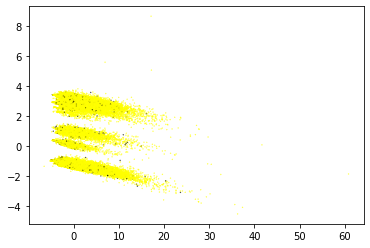

In [25]:
#考虑的问题有：由于样本过于不平衡，深度学习基本没法用（因为minibatch很有可能得到全0的输出），集成学习是一个很不错的方法
#先考虑一下用pca画个图看看是啥情况
train_set_X = train_set.drop('target', axis=1)
train_set_y = train_set['target']
#归一化
X_scaled = scale(train_set_X)
x_reduced = PCA(n_components=2).fit_transform(X_scaled)
color = ['yellow', 'black']
fig=plt.figure()
ax=plt.subplot()
ax.scatter(x_reduced[:,0], x_reduced[:,1], c=train_set_y, s=0.1, cmap=mp.colors.ListedColormap(color))

In [24]:
#pca二维图像表示1的分布基本没有什么规律性，所以可以舍弃掉分割算法，包括knn, svm, lda, qda, lr, 所有线性分类器基本凉凉，所以只能用树


In [26]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from sklearn.metrics import matthews_corrcoef

In [27]:
index1 = train_set_y[train_set_y == 1].index
index0 = train_set_y[train_set_y == 0].index
train_set_X1 = train_set.loc[index1]
train_set_X0 = train_set.loc[index0]

In [28]:
#对train_set_X0按照X1的shape进行切割, 并存放在字典中
sub_d = {}
for i in range(35):
    sub_d[i] = train_set_X0.sample(n=2413, replace=False, axis=0)

In [29]:
#创建一个字典，用来存放所有特征，全部拟合后再选取
index = {}
for i in train_set_X0.columns:
    index[i] = 0

In [30]:
#拟合 xgboost, 按照importance选取features
for i in range(35):
    train = train_set_X1.append(sub_d[i])
    X_train = train.drop('target', axis=1)
    y_train = train.target
    model = XGBClassifier()
    model_result = model.fit(X_train, y_train)
    results = pd.DataFrame()
    results['column'] = X_train.columns
    results['importances'] = model.feature_importances_
    results.sort_values(by='importances',ascending=False,inplace=True)
    result = results[:30]
    for i in result.column:
        index[i] += 1

In [31]:
#选取前30个数作为features
sort = sorted(index.items(), key=lambda x: x[1], reverse=True)[:30]
sort_f = [x[0] for x in sort]
selected_X_train = train_set_X[sort_f]

In [32]:
selected_X_train

,appl_sbm_tm,id_card,auth_time,spt_id_card,account_grade,addr_id,amt_order,order_std,train_order_info_time_min,unit_price_null,...,bankcard_total_num,order_md5_num,order_skew,wechat_bound,fxpho_rate,SC,train_order_info_time_max,train_order_info_time_dur,quota,order_sum
1,72.0,2.00,715.0,1.0,4.04,7.0,69.0000,576.079251,15631.00,1.0,...,3.0,12.0,1.719580,1.0,0.375000,0.0,16945.00,1314.0,4416.0,5031.55
2,30.0,4.00,1219.0,1.0,2.00,1.0,1837.0000,0.000000,16232.00,1.0,...,3.0,1.0,-0.022231,1.0,0.500000,0.0,16232.00,0.0,0.0,3674.00
4,247.0,6.00,1399.0,1.0,1.76,1.0,95.0634,0.000000,17056.94,0.0,...,3.0,0.0,0.150130,1.0,1.000000,0.0,17057.44,0.0,0.0,0.00
5,354.0,4.00,1070.0,1.0,3.00,0.0,52.9116,1.752567,17061.98,0.0,...,1.0,0.0,-0.007238,1.0,0.999999,0.0,17062.98,0.0,0.0,0.00
7,365.0,2.00,479.0,1.0,1.80,1.0,46.7304,22.380842,17055.87,0.0,...,2.0,0.0,0.445477,0.4,0.999999,0.0,17056.13,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120923,343.0,1.00,887.0,1.0,2.00,3.0,128.0000,37.845740,17015.00,0.0,...,1.0,5.0,0.899267,0.0,0.666666,0.0,17076.00,60.0,0.0,342.00
120924,362.0,4.76,890.0,0.0,1.42,0.0,75.0239,0.000000,17057.00,0.0,...,2.0,0.0,-0.078899,0.0,0.000000,1.0,17057.23,0.0,0.0,0.00
120925,346.0,3.64,888.0,0.0,1.18,0.0,77.5103,0.000000,17057.00,0.0,...,1.0,0.0,-0.170157,0.0,0.000000,0.0,17057.17,0.0,0.0,0.00
120927,227.0,4.00,882.0,1.0,2.00,2.0,1286.0000,0.000000,16624.00,0.0,...,1.0,1.0,0.008184,0.0,1.000000,0.0,16624.00,0.0,0.0,1286.00


In [33]:
#拟合lightgbm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [134]:
# 这两个参数基本可以确定树的大小及复杂度，可以同时调整
parameters = {
    'max_depth': [4,6,8],
    'num_leaves': [20,30,40],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 6,
                         num_leaves = 40,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {}'.format(gsearch.best_params_))
print('best score of auc: {}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'max_depth': 4, 'num_leaves': 20}
best score of auc: 0.8419955553752644
[0.84199556 0.84199556 0.84199556 0.84155344 0.83890289 0.83836504
 0.84154313 0.83939973 0.83715743]
[{'max_depth': 4, 'num_leaves': 20}, {'max_depth': 4, 'num_leaves': 30}, {'max_depth': 4, 'num_leaves': 40}, {'max_depth': 6, 'num_leaves': 20}, {'max_depth': 6, 'num_leaves': 30}, {'max_depth': 6, 'num_leaves': 40}, {'max_depth': 8, 'num_leaves': 20}, {'max_depth': 8, 'num_leaves': 30}, {'max_depth': 8, 'num_leaves': 40}]


In [137]:
# 该步骤主要是防止树过拟合
parameters = {
'min_child_samples': [18,19,20,21,22],
'min_child_weight': [0.001,0.002],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'min_child_samples': 22, 'min_child_weight': 0.001}
best score of auc: 0.8434239005501368
[0.84279192 0.84279192 0.84243757 0.84243757 0.84241775 0.84241775
 0.84199556 0.84199556 0.8434239  0.8434239 ]
[{'min_child_samples': 18, 'min_child_weight': 0.001}, {'min_child_samples': 18, 'min_child_weight': 0.002}, {'min_child_samples': 19, 'min_child_weight': 0.001}, {'min_child_samples': 19, 'min_child_weight': 0.002}, {'min_child_samples': 20, 'min_child_weight': 0.001}, {'min_child_samples': 20, 'min_child_weight': 0.002}, {'min_child_samples': 21, 'min_child_weight': 0.001}, {'min_child_samples': 21, 'min_child_weight': 0.002}, {'min_child_samples': 22, 'min_child_weight': 0.001}, {'min_child_samples': 22, 'min_child_weight': 0.002}]


In [139]:
# 该步骤主要是通过随机选择一定比列的特征去模型中，防止过拟合
parameters = {
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}


gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'feature_fraction': 0.7}
best score of auc: 0.8434239005501368
[0.84228108 0.84220848 0.8434239  0.84204061 0.84148859 0.84162634]
[{'feature_fraction': 0.5}, {'feature_fraction': 0.6}, {'feature_fraction': 0.7}, {'feature_fraction': 0.8}, {'feature_fraction': 0.9}, {'feature_fraction': 1}]


In [140]:
# bagging_fraction+bagging_freq参数必须同时设置，bagging_fraction相当于subsample样本采样，可以使bagging更快的运行，同时也可以降拟合。
#bagging_freq默认0，表示bagging的频率，0意味着没有使用bagging，k意味着每k轮迭代进行一次bagging。
parameters = {
     'bagging_fraction': [0.8,0.9,1],
     'bagging_freq': [2,3,4],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'bagging_fraction': 0.9, 'bagging_freq': 3}
best score of auc: 0.8449924702407091
[0.8443856  0.84386368 0.84342208 0.8439438  0.84499247 0.84373795
 0.8434239  0.8434239  0.8434239 ]
[{'bagging_fraction': 0.8, 'bagging_freq': 2}, {'bagging_fraction': 0.8, 'bagging_freq': 3}, {'bagging_fraction': 0.8, 'bagging_freq': 4}, {'bagging_fraction': 0.9, 'bagging_freq': 2}, {'bagging_fraction': 0.9, 'bagging_freq': 3}, {'bagging_fraction': 0.9, 'bagging_freq': 4}, {'bagging_fraction': 1, 'bagging_freq': 2}, {'bagging_fraction': 1, 'bagging_freq': 3}, {'bagging_fraction': 1, 'bagging_freq': 4}]


In [141]:
# 本步骤通过L1正则化和L2正则化降低过拟合
parameters = {
     'reg_alpha': [0.001, 0.01, 0.1, 1, 3, 5, 10],
     'reg_lambda': [0.001, 0.01, 0.1, 1, 3, 5, 10]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'reg_alpha': 10, 'reg_lambda': 0.1}
best score of auc: 0.8459991378673014
[0.84404865 0.84317257 0.84393257 0.84294303 0.84321202 0.84329533
 0.84480864 0.84314144 0.84320866 0.84358873 0.84335665 0.8432829
 0.84294037 0.8443879  0.84331565 0.84362894 0.84246665 0.84306489
 0.84394787 0.84287026 0.8443308  0.84372779 0.84341148 0.84430417
 0.84474377 0.8443608  0.84349136 0.84472552 0.84429411 0.84442443
 0.84335716 0.84379859 0.84424498 0.84478738 0.84534812 0.84434893
 0.84365073 0.84360371 0.84430712 0.8430333  0.84548001 0.84595334
 0.84493627 0.84477639 0.84599914 0.84569241 0.84521082 0.84571863
 0.84582091]
[{'reg_alpha': 0.001, 'reg_lambda': 0.001}, {'reg_alpha': 0.001, 'reg_lambda': 0.01}, {'reg_alpha': 0.001, 'reg_lambda': 0.1}, {'reg_alpha': 0.001, 'reg_lambda': 1}, {'reg_alpha': 0.001, 'reg_lambda': 3}, {'reg_alpha': 0.001, 'reg_lambda': 5}, {'reg_alpha': 0.001, 'reg_lambda': 10}, {'reg_alpha': 0.01, 'reg_lambda': 0.001}, {'reg_alpha': 0.01, 'reg_lambda

In [143]:
# cat_smooth为设置每个类别拥有最小的个数，主要用于去噪
parameters = {
     'cat_smooth': [0, 5, 10, 15, 20, 40]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         reg_alpha = 10,
                         reg_lambda = 0.1,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'cat_smooth': 0}
best score of auc: 0.8459991378673014
[0.84599914 0.84599914 0.84599914 0.84599914 0.84599914]
[{'cat_smooth': 0}, {'cat_smooth': 5}, {'cat_smooth': 10}, {'cat_smooth': 15}, {'cat_smooth': 20}]


In [144]:
# scale_pos_weight 按照网上的说法是-/+, 但是从调参结果来看并非如此。
parameters = {
     'scale_pos_weight': [1, 2, 5, 10, 15, 20, 40]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         reg_alpha = 10,
                         reg_lambda = 0.1,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 10,
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(selected_X_train, train_set_y)
print('The best parameter: {0}'.format(gsearch.best_params_))
print('best score of auc: {0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/y

The best parameter: {'scale_pos_weight': 5}
best score of auc: 0.8491233458196653
[0.84773618 0.84879671 0.84912335 0.84599914 0.84323999 0.84144057
 0.83748996]
[{'scale_pos_weight': 1}, {'scale_pos_weight': 2}, {'scale_pos_weight': 5}, {'scale_pos_weight': 10}, {'scale_pos_weight': 15}, {'scale_pos_weight': 20}, {'scale_pos_weight': 40}]


In [34]:
#最终可以确定所有的超参数, 下一步是对测试集采用随即森林填补缺失值, 并进行预测。
test_set['appl_sbm_tm'] = (test_set['appl_sbm_tm'] - min(test_set['appl_sbm_tm'])).apply(lambda x: x.days)
test_set['auth_time'] = (test_set['auth_time'] - min(test_set['auth_time'])).apply(lambda x: x.days)
Imputed_Pollutants_t = imputer.fit_transform(test_set)

Iteration: 0
Iteration: 1
Iteration: 2


In [124]:
#填补完缺失值后，将缺失值带入dataframe中
for idx in range(test_set.shape[0]):
    test_set.iloc[idx] = Imputed_Pollutants_t[idx]

(33755, 94)

In [36]:
#分出测试集以及训练集
test_set_X = test_set.drop('target', axis=1)
test_set_y = test_set['target']

In [125]:
#选取测试集的特征
selected_X_test = test_set_X[sort_f]
selected_X_test.columns

Index(['appl_sbm_tm', 'id_card', 'auth_time', 'spt_id_card', 'account_grade', 'addr_id', 'amt_order', 'order_std', 'train_order_info_time_min', 'unit_price_null', 'credit_score', 'remaining', 'diff_day', 'sex', 'qq_bound', 'order_mean', 'olp_rate', 'bankcard_card_count', 'Unk_rate', 'cod_rate', 'bankcard_total_num', 'order_md5_num', 'order_skew', 'wechat_bound', 'fxpho_rate', 'SC', 'train_order_info_time_max', 'train_order_info_time_dur', 'quota', 'order_sum'], dtype='object')

In [120]:
# 采用单个lightgbm进行预测
gbm_pre = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 4,
                         num_leaves = 20,
                         learning_rate = 0.05,
                         feature_fraction = 0.7,
                         min_child_samples=22,
                         min_child_weight=0.001,
                         bagging_fraction = 0.9,
                         bagging_freq = 3,
                         reg_alpha = 10,
                         reg_lambda = 0.1,
                         cat_smooth = 0,
                         num_iterations = 200,
                         scale_pos_weight = 5,
                        )
gbm_pre.fit(selected_X_train, train_set_y)
#eval_set=[(X_test, y_test)],eval_metric='auc',early_stopping_rounds=5,其他参数看情况再调节

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               cat_smooth=0, class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.7, importance_type='split',
               learning_rate=0.05, max_depth=4, metric='binary_logloss,auc',
               min_child_samples=22, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=200, num_leaves=20,
               objective='binary', random_state=None, reg_alpha=10,
               reg_lambda=0.1, scale_pos_weight=5, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [121]:
#对测试集进行预测
y_pred = gbm_pre.predict(selected_X_test, num_iteration=gbm_pre.best_iteration_)
#y_predprob = rf.predict_proba(selected_X_test)[:,1]
#print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
y_predprob = gbm_pre.predict_proba(selected_X_test)[: ,1]
y_predprob.shape

(33755,)

In [122]:
#metrics.matthews_corrcoef(y_test, y_predprob)
#y_predprob[y_predprob >= 0.03] = 1
#y_predprob[y_predprob < 0.03] = 0
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
fp_rate, tp_rate, thresholds = metrics.roc_curve(test_set_y, y_predprob)
metrics.auc(fp_rate, tp_rate)

0.7388153971308333

In [ ]:
metrics.confusion_matrix(y_test, y_predprob)

In [ ]:
metrics.accuracy_score(y_test, y_predprob)

In [ ]:
maxmize = 0
for item in zip(fpr, tpr, thresholds):
    if ((item[0])**2 + (item[1] - 1)**2) > maxmize:
        ther = item[2]
        maxmize = ((item[0])**2 + item[1]**2)

In [ ]:
y_predprob[y_predprob >= 0.03] = 1
y_predprob[y_predprob < 0.03] = 0
metrics.matthews_corrcoef(y_test, y_predprob)

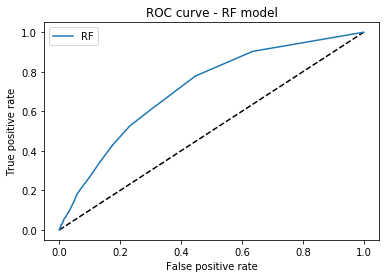

In [24]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [21]:
y_predprob[y_predprob >= 0.03] = 1
y_predprob[y_predprob < 0.03] = 0

In [22]:
metrics.matthews_corrcoef(y_test, y_predprob)

0.1114062313707239

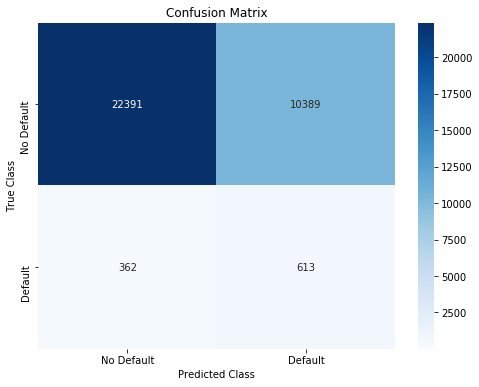

In [26]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test.values, y_predprob)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
ax.set_ylim([1,2])
plt.show()

In [ ]:
plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
plt.title(title)    # 图像标题
plt.colorbar()
num_local = np.array(range(len(labels_name)))    
plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
plt.ylabel('True label')    
plt.xlabel('Predicted label')